<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-4-IP/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

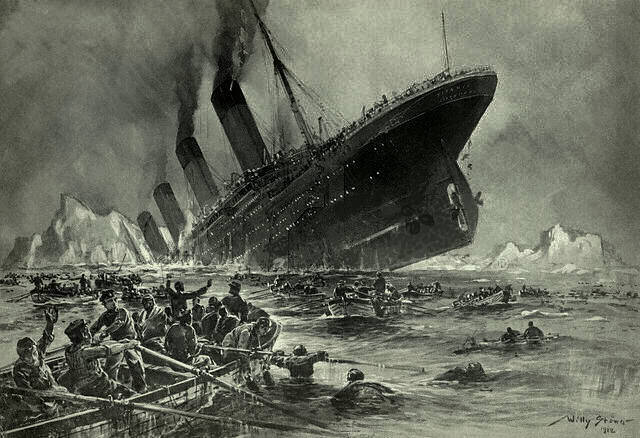

## 1. Defining the Question

### a) Specifying the Question

The RMS Titanic was a British passenger liner, operated by the White Star Line. It sunk in the North Atlantic Ocean on 15th April 1912 after striking an iceberg during her maiden voyage from Southampton port, UK, to New York City, USA. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadlierst commercial peacetime maritime disasters in modern history.

This project seeks to determine the factors that determined whether a passenger survived or not. Furthermore, a model that accurately predicts passenger survival will be developed.

### b) Defining the Metric for Success

1. Accurate determination of factors that greatly affected passenger survival.
2. Attaining prediction accuracies greater than 80%.

### c) Understanding the context 

The Titanic sunk in 1912, when data wa recorded on paper and stored in files. Furthermore, some of the data was estimated, as data recording was not as detailed as it is today. Therefore, obtaining an accuracy greater than 80% after model otpimization will be satisfactory.

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling: KNN Classification
10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting passenger survival.
2. The dataset should lead to a high model fit (high accuracy, after all possible model optimization procedures have been applied.

## 2. Data Understanding

In [357]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [358]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 4 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a) Reading the Data

In [359]:
# Train dataset loading
train = pd.read_csv('train.csv')
# Test dataset loading
test = pd.read_csv('test.csv')

### b) Checking the Data

**Number of Records**

In [360]:
# Number of rows and columns
# Train dataset
print(f'Train dataset: records= {train.shape[0]} and columns = {train.shape[1]}')
# Test dataset
print(f'Test dataset: records= {test.shape[0]} and columns = {test.shape[1]}')

Train dataset: records= 891 and columns = 12
Test dataset: records= 418 and columns = 11


The train dataset has a column that is not present in the test dataset.

**Top Dataset Preview**

In [361]:
# Train dataset
# First 5 records
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [362]:
# Test dataset
# First 5 records
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The test set does not have the label column, 'Survived'. Therefore, it will be used to make predictions.

**Bottom Dataset Preview**

In [363]:
# Train dataset
# Last 5 records
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [364]:
# Test dataset
# Last 5 records
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


The Cabin column has maissing values.

### c) Checking Datatypes

In [365]:
# Dataset infromation
# Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Datatypes are as required. However, the Age and Cabin columns have numerous missing values.

In [366]:
# Dataset infromation
# Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The datatypes are as required. Similar to the train dataset, the Cabin and age columns have numerous missing values.

## 3. External Dataset Validation 

The dataset is similar to a Kaggle Titanic dataset [link](https://www.kaggle.com/competitions/titanic/overview). It has also been used by the Computer Science department in Stanford University [link](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html) as part of course work. Stanford is a well known ivy league university, therefore, the dataset is valid.


## 4. Data Preperation

### a) Validation

The PassengerId and the Name columns will be removed as it is not relevant to the study.

In [367]:
# Checking relevance of the ticket column
print(f'Percentage of unique values (train): {(len(train.Ticket.unique()) / train.shape[0]) * 100}%')
print(f'Percentage of unique values (test): {(len(test.Ticket.unique()) / test.shape[0]) * 100}%')

Percentage of unique values (train): 76.43097643097643%
Percentage of unique values (test): 86.8421052631579%


As the ticket numbers have a high number of unique values, it will be dropped from both datasets, as the numbers seem to be the ticket reference number.

In [368]:
# Removing columns that do not add meaning to the project
train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [369]:
# Ensuring changes have been made
print(f'Train set columns: {len(train.columns.values)}')
print(f'Test set columns: {len(test.columns.values)}')

Train set columns: 9
Test set columns: 8


### b) Completeness

**Percentage of missing values**

In [370]:
# Function to find the percentage of missing values
def PercentageMissing(data):
  # Precentage of missing values
  for col in data.columns.tolist():
    missing = data[col].isnull().sum()
    if missing > 0:
      print(f'{col} = {(missing/data.shape[0])*100}%')

In [371]:
# Checking for misssing values
# Train dataset
PercentageMissing(train)

Age = 19.865319865319865%
Cabin = 77.10437710437711%
Embarked = 0.22446689113355783%


In [372]:
# Checking for misssing values
# Test dataset
PercentageMissing(test)

Age = 20.574162679425836%
Fare = 0.23923444976076555%
Cabin = 78.22966507177034%


Missing values in the Cabin column form more that 75% of the dataset in both sets, therefore, it will be dropped.

In [373]:
# Dropping the Cabin column
# Train dataset
train.drop('Cabin', axis = 1, inplace = True)
# Test dataset
test.drop('Cabin', axis = 1, inplace = True)

**Imputing missing values**

The age column will be imputed based on the mean age per passenger class.

*Train dataset*

In [374]:
# Unique passenger class values
train.Pclass.unique()

array([3, 1, 2])

In [375]:
# Function used to fill in missign values using the column mean or highest column
# frequency.
def Fillna(class_values,  ref_col, target_col, fill_value, data):
  means = []
  freqs = []
  if fill_value == 'mean':
    for val in class_values:
      means.append(int(data[data[ref_col] == val][target_col].mean()))
    for val, fill in zip(class_values, means):
      data.loc[(data[ref_col] == val) & (data[target_col].isnull() == True), target_col] = fill
    
  elif fill_value == 'freq':
    for val in class_values:
      freqs.append(data[data[ref_col] == val][target_col].value_counts().index[0])
    for val, fill in zip(class_values, freqs):
      data.loc[(data[ref_col] == val) & (data[target_col].isnull() == True), target_col] = fill


In [376]:
# Imputing mising values in the age column using the mean age per passenger class.
class_values = list(train.Pclass.unique())
Fillna(class_values, 'Pclass', 'Age', 'mean', train)
# Imputing mising values in the embarked column using the most frequent label
# per passenger class.
Fillna(class_values, 'Pclass', 'Embarked', 'freq', train)

In [377]:
# Confirming that changes have been made.
# Train dataset
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

*Test dataset*

In [378]:
# Imputing mising values in the age and fare columns 
# column using the mean age per passenger class.
# Passenger class list
class_values = list(test.Pclass.unique())
# Age column
Fillna(class_values, 'Pclass', 'Age', 'mean', test)
# Fare column
Fillna(class_values, 'Pclass', 'Fare', 'mean', test)

In [379]:
# Confirming that changes have been made.
# Test dataset
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

All missing values have been dealth with.

### c) Consistency

Checking for duplicates.

In [380]:
# Train dataset
train.duplicated().any().any()

True

In [381]:
# Test dataset
test.duplicated().any().any()

True

There are no duplicates in both datasets.

### d) Uniformity

Checking uniformity of column names.

In [382]:
# Train dataset
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [383]:
# Test dataset
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Converting the column name case to lower case for convenience during refrencing.

In [384]:
# Converting column names to lower case
# Train dataset
train.columns = train.columns.str.lower()
# Test dataset
test.columns = test.columns.str.lower()

Checking changes.

In [385]:
# New column case
print(f'Train dataset: {train.columns}')
print(f'Test dataset: {test.columns}')

Train dataset: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')
Test dataset: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')


### e) Outliers

Checking fot outliers.

In [386]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [387]:
# Train dataset
outliers(train)

Number of outliers = 302
Percentage = 33.89450056116723%


In [388]:
# Test dataset
outliers(test)

Number of outliers = 133
Percentage = 31.818181818181817%


Outliers will be retained, as the test set has outliers. A train dataset without outliers will be created to compare the performance.

In [389]:
# Dataset without outliers
# Removing outliers 
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train_no =  train[~ ((train< (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_no.shape

(589, 8)

The test set outliers will not be dropped.as it will be used to make predictions.

## 5. Descriptive Analysis

The dataset descrition can be found here [link](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

### a) Univariate Analysis

#### Categorical

In [390]:
# Categorical Plots
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'mako', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))
  plt.show()

In [391]:
# Number of unique values per column
for col in train.columns.tolist():
  print(f'{col}: {len(train[col].unique())}')

survived: 2
pclass: 3
sex: 2
age: 88
sibsp: 7
parch: 7
fare: 248
embarked: 3


In [392]:
# Categorical columns
categorical = train.select_dtypes(include = 'object').columns.tolist()
categorical.extend(['survived', 'pclass'])
categorical

['sex', 'embarked', 'survived', 'pclass']

**Survival**

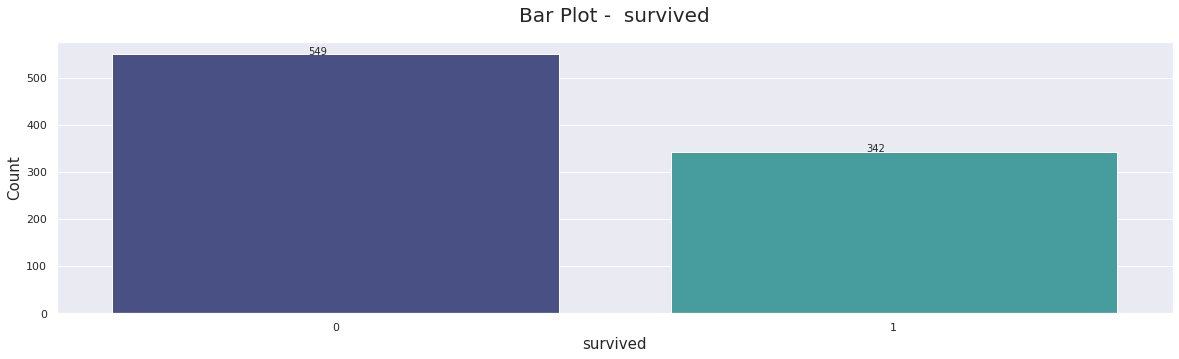

In [393]:
# Passengers who survived, and those who did not.
CatPlots('survived', 0, train)

Most passengers did not survive.

**Passenger Class**

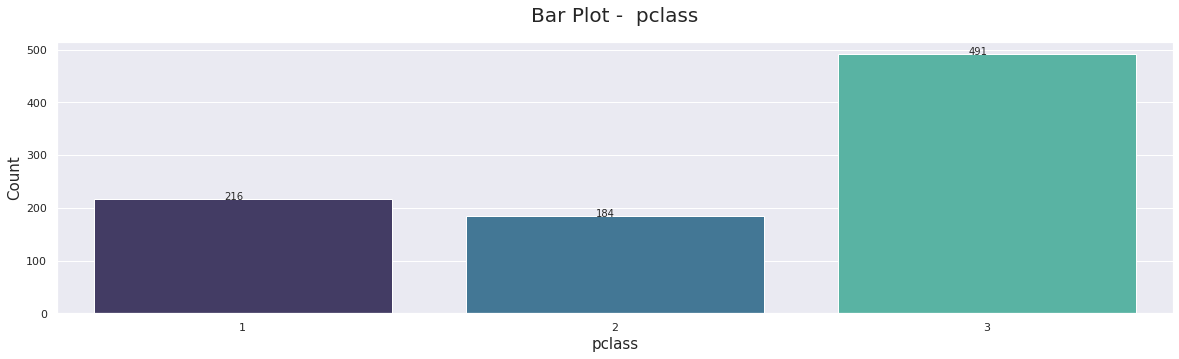

In [394]:
# Passenger ticket class
CatPlots('pclass', 0, train)

* Most passengers were third class passengers. 
* Second class compartments had the least amount of passengers.

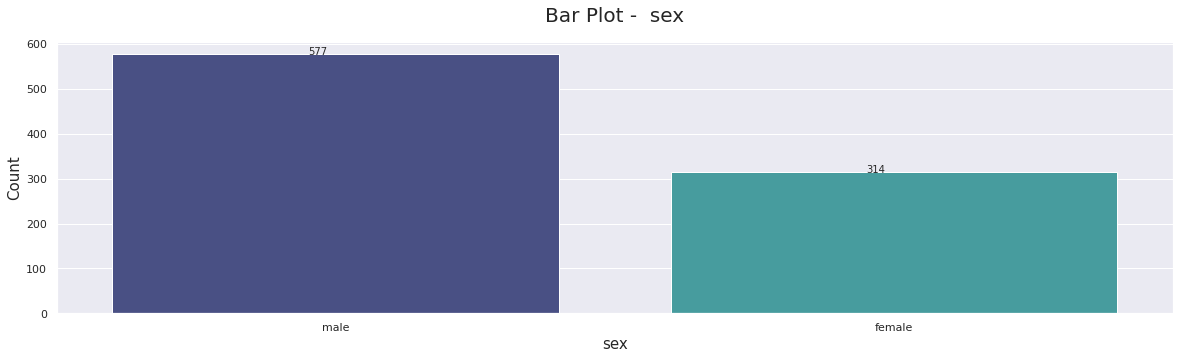

In [395]:
# Paasenger gender distribution.
CatPlots('sex', 0, train)

Most passengers were male.

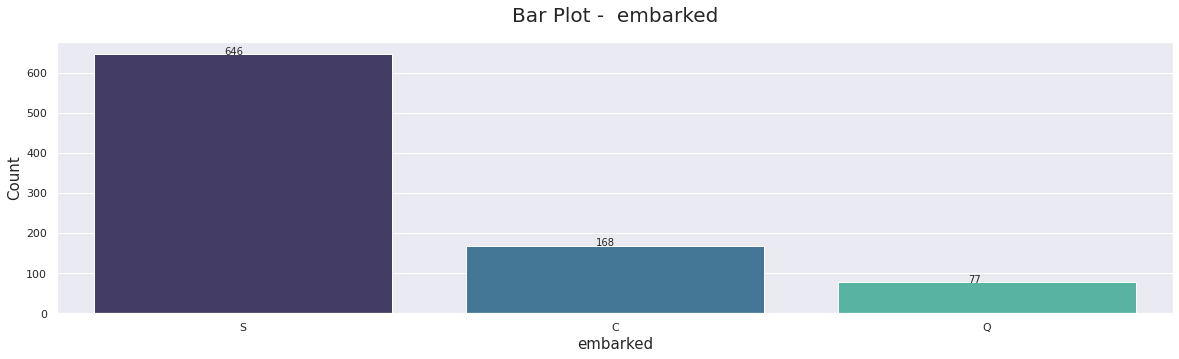

In [396]:
# Point of embarkation.
CatPlots('embarked', 0, train)

**Ports**
1. C = Cherbourg (France)
2. Q = Queenstown (Ireland)
3. S = Southampton (United Kingdom)

Most passengers boarded the vessel at Southampton.

#### Numerical

In [397]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data):
  fig, ax = plt.subplots(1,2, figsize = (12, 5))
  # Outliers
  # Distribution plot
  sns.distplot(data[column], hist=True, ax=ax[0], color = 'teal')
  ax[0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0].set_xlabel(column, fontsize=8)
  ax[0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data[column], ax = ax[1], color = 'teal')
  ax[1].set_title(f'Outliers: Box Plot - {column}')
  ax[1].set_xlabel(column)


In [398]:
# Continuos columns
continuous = train.select_dtypes(exclude = 'object').columns.tolist()
continuous = continuous[2:]
continuous

['age', 'sibsp', 'parch', 'fare']

**Fare**

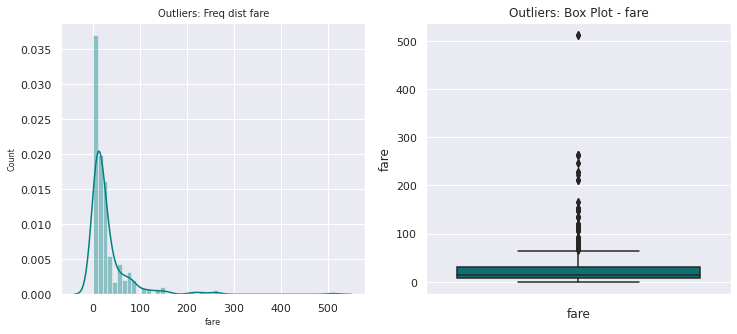

In [399]:
# Passenger fare
NumericalPlots('fare', train)

* Most of the passengers are third class passengers, therefore, the distribution is positively skewed.
* The outliers consist of higher passenger fares, most likely for first class passengers as they had the second highest numbers (population).

**Age**

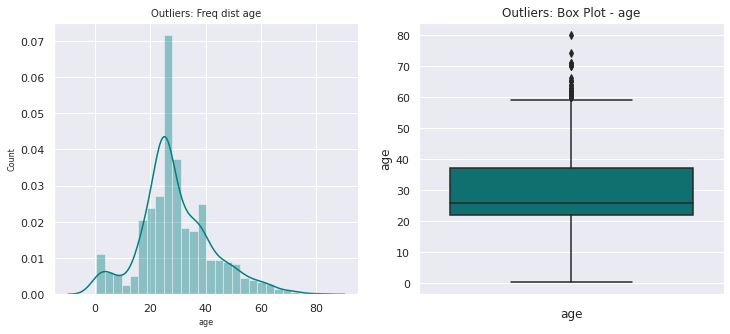

In [400]:
# Age of the passengers
NumericalPlots('age', train)

Most passengers had an age within the range of 20 to 40.

**Siplings and Spouses**

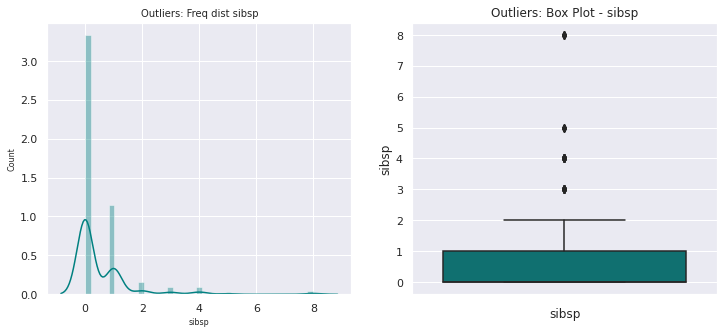

In [401]:
# Number of passengers who boarded with their siblings or spouses.
NumericalPlots('sibsp', train)

Most passengers did not board with their siblings or spouses. Those who did were few in number.


**Parents and Children**

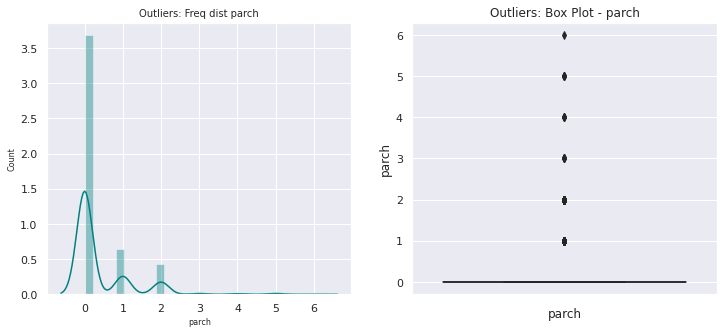

In [402]:
# Number of nuclear family members per family group.
NumericalPlots('parch', train)

Most passengers did not come with their families, or were childless. Few cam in groups of tho and three.

### b) Bivariate Analysis

#### Categorical - Categorical

In [403]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, rot, color, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5), color = color)
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = rot)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

In [404]:
# Categorical columns
categorical

['sex', 'embarked', 'survived', 'pclass']

**Survived Vs Passenger Class**

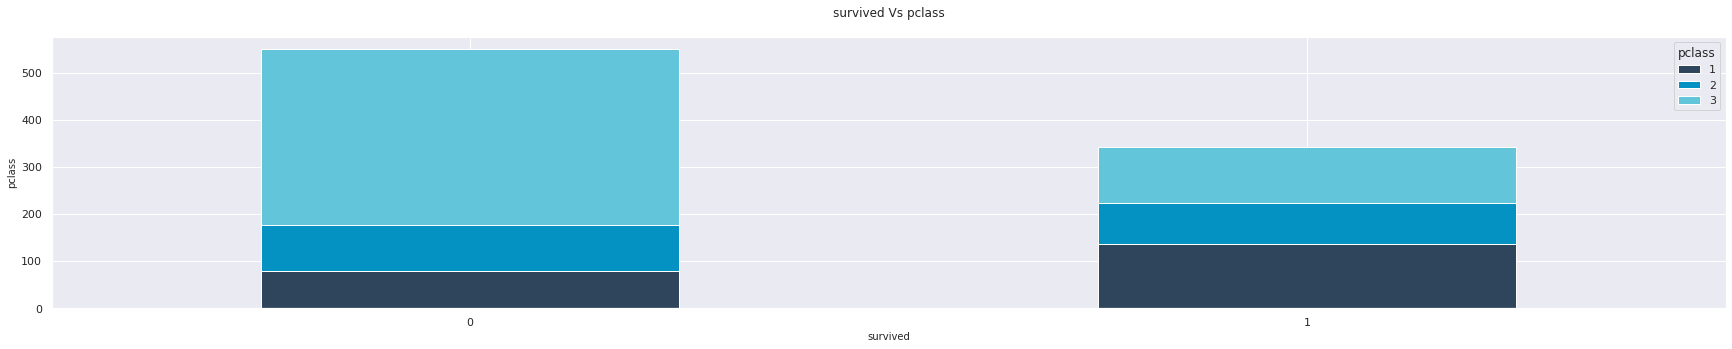

In [405]:
# Survival depending on the ticket class of the passenger.
color = ['#2f455c', '#0492C2', '#63C5DA']
CrosstabPlot('survived', 'pclass', 0, color, train)

Most of the passengers who perished had purchased thrid class tickets. Majority of the survivors were first class passengers.

**Survival Vs Sex**

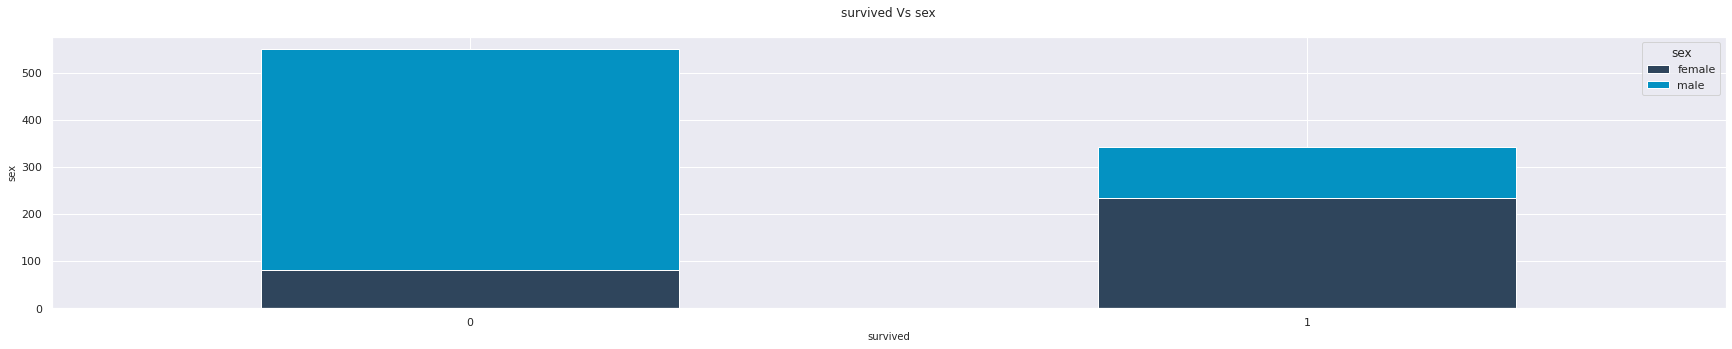

In [406]:
# Survival depending on the gender of the passenger.
color = ['#2f455c', '#0492C2', '#63C5DA']
CrosstabPlot('survived', 'sex', 0, color, train)

Most of the survivors were female. This could be due to the fact that most of the passengers were men. Furthermore, in the 1900s (1912 = maiden voyage), women and children were given boarding priority onto life boats.

**Survival Vs Embarkation Port**

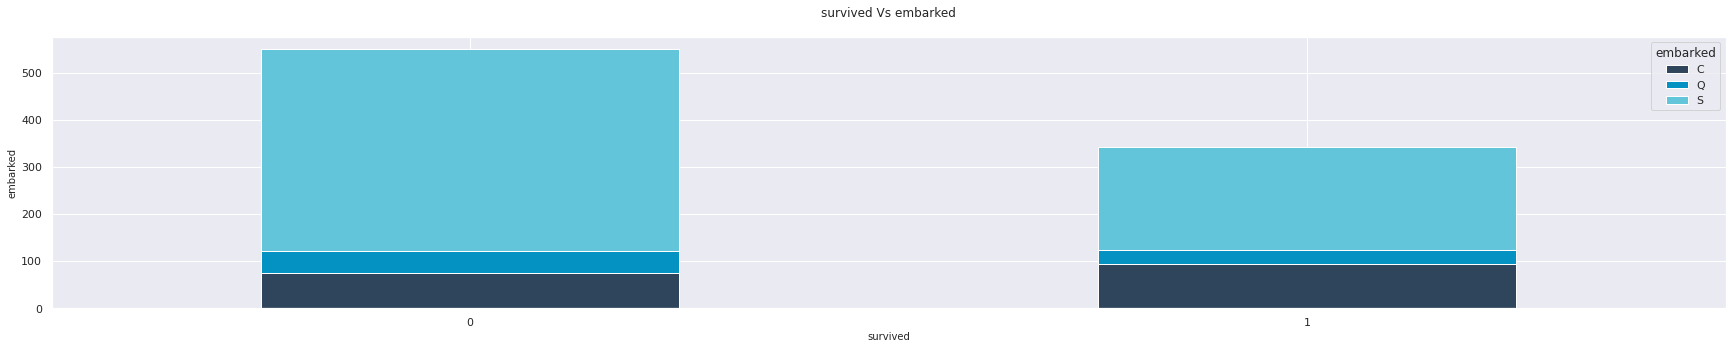

In [407]:
# Survival depending on the gender of the passenger.
color = ['#2f455c', '#0492C2', '#63C5DA']
CrosstabPlot('survived', 'embarked', 0, color, train)

Most people who perished or survived were embarked at Southampton, they formed marjority of the passengers.

#### Numerical - Numerical

In [408]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [409]:
# Pairplot Function
def PairPlot(data):
  cols = data.columns.values
  plot = sns.pairplot(data)
  plot.fig.set_size_inches(10,5)
  plot.fig.suptitle(f'Pairplot: {cols[0]} - {cols[1]}', y = 1.05)
  # plt.title()
  plt.show()
  print('\nCorrelation\n')
  Corr(cols[0], cols[1], data)

In [410]:
# Continuous columns
continuous

['age', 'sibsp', 'parch', 'fare']

**Age Vs Fare**

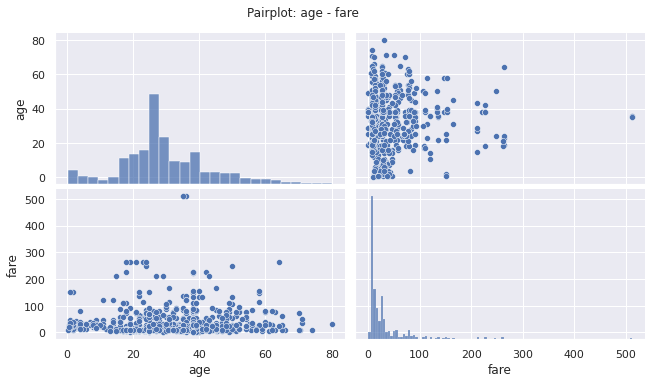


Correlation

Correlation Matrix : 
           age      fare
age   1.000000  0.121503
fare  0.121503  1.000000


In [411]:
# Relation between age and fare
PairPlot(train[['age', 'fare']])

There is a very weak but positive relationship between the age of the passengers and the fare.

**Fare Vs Number of Siblings and Spouses**

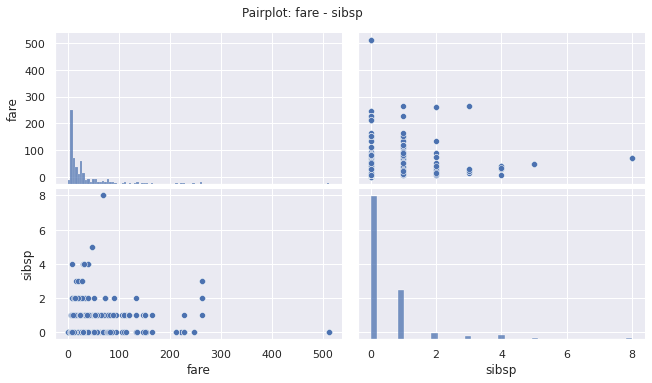


Correlation

Correlation Matrix : 
           fare     sibsp
fare   1.000000  0.159651
sibsp  0.159651  1.000000


In [412]:
# Relation between fare and the number of siblings and spouses
PairPlot(train[['fare', 'sibsp']])

There is a very weak but positive relationship between the number of siblings and spouses and the fare.

**Fare Vs Number of Parents and Children**

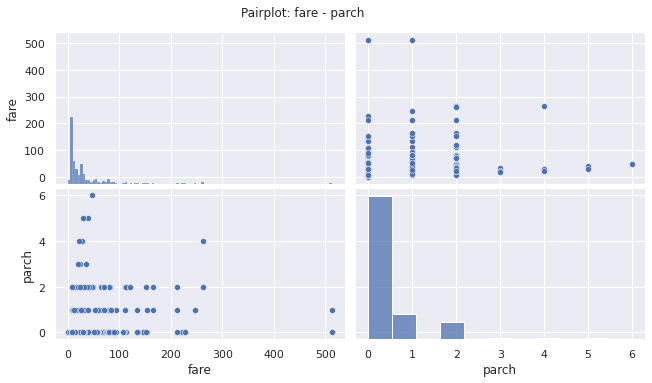


Correlation

Correlation Matrix : 
           fare     parch
fare   1.000000  0.216225
parch  0.216225  1.000000


In [413]:
# Relation between fare and the number of parents and children
PairPlot(train[['fare', 'parch']])

There is a very weak but positive relationship between the number of parents and children and the fare.

Therfore, the fare must have been charged based on the passenger class.

#### Numerical - Categorical

In [414]:
# Bar plot function
def BarPlotBiv(x,y, rot, data):
  fig, ax = plt.subplots(figsize = (20,5))
  sns.barplot(data[x], data[y], palette = 'mako')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.xticks(rotation = rot)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.show()

**Survival Vs Age**

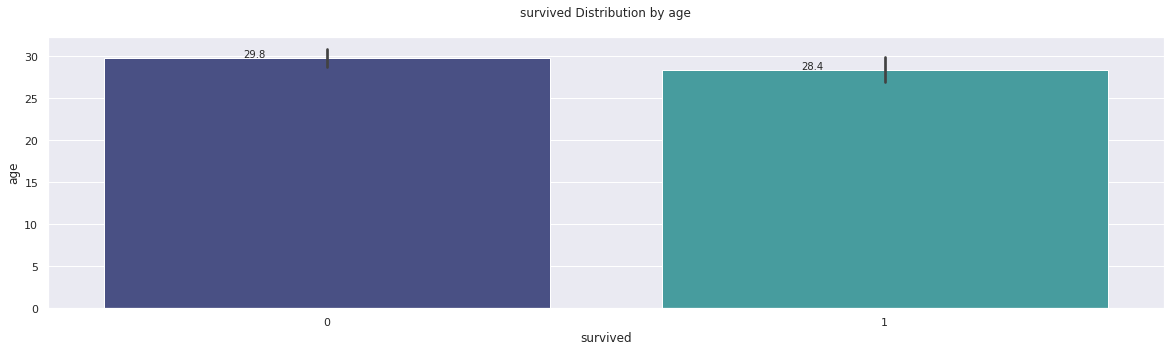

In [415]:
# Age of the passengers and the survival status.
BarPlotBiv('survived', 'age', 0, train)

* Most of the passengers who perished had an age of 29 - 30.
* Most of the passengers who survived had an age of 28 - 29.

**Passenger Class Vs Age**

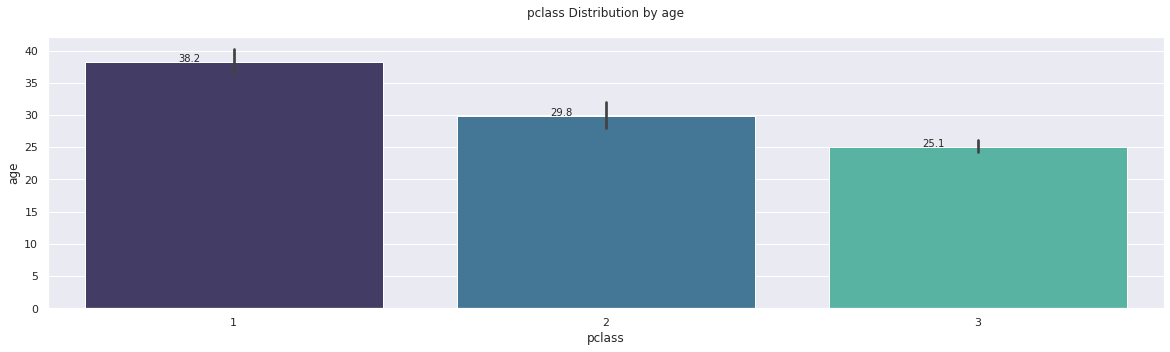

In [416]:
# Age of the passengers and the survival status.
BarPlotBiv('pclass', 'age', 0, train)

The mean age of the passengers decreases with the class quality, that is, most of the older passengers were in first class, while the youngest passengers were third class passengers.

**Embarkation Port Vs Fare**

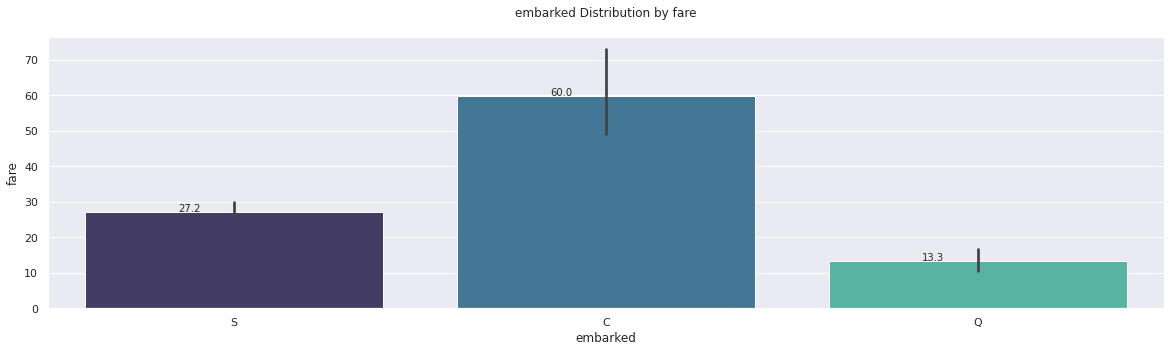

In [417]:
# Port Vs Fare
BarPlotBiv('embarked', 'fare', 0, train)

**Ports**
1. C = Cherbourg (France)
2. Q = Queenstown (Ireland)
3. S = Southampton (United Kingdom)

Passengers from Cherboug port spent the highest amount on fare, followed by those from Southampton, then Queenstown.

**RMS TITANIC ROUTE**

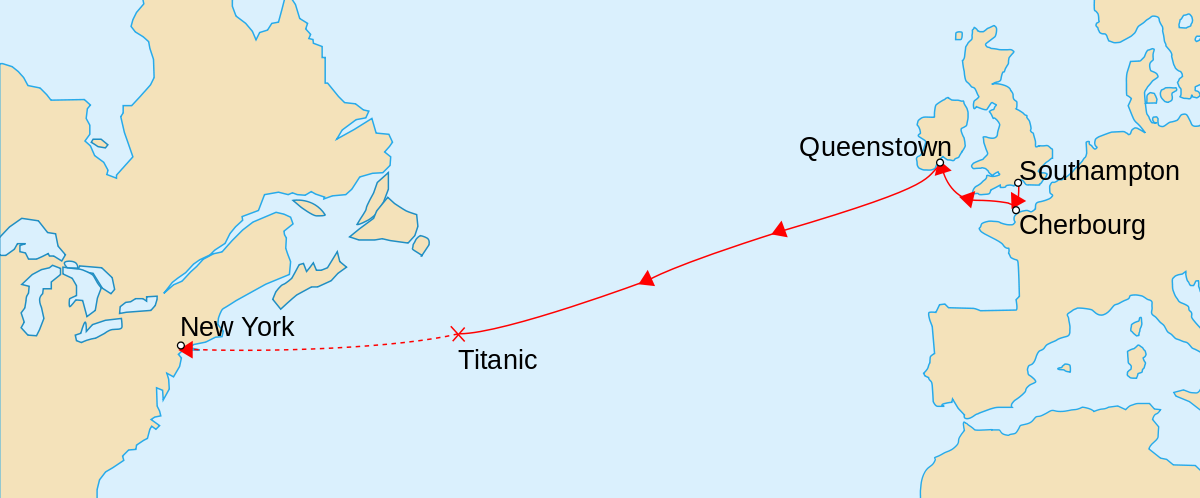

The ports are farely close to each other, therefore, this could not be the reason behind the fare distribution.

#### **Analysis Summary**

1. Most of the passengers perished when the ship sank.
2. The passengers were moslty mage up of third class passengers.
3. Most passenger were male.
4. Most of the passengers embarked on Southampton (UK), followed by Cherbourg (France) and finally Queenstown (Ireland).
5. Most passengers boarded alone, without the company of siblings, spouses and children.
6. Most of the third class passenger perished, they had the largest numbers in the total passenger population.
7. Men made up a majority of the deceased, while most women survived as women and children had the highest priority when it came to boarding the life boats.
8. Most of the passengers who died embarked at Southampton, they had the highest numbers before the ship sunk.
9. Passengers with an age of around 29 had the highet fatality rate. as well as survival rate. Most of the passengers were around this age.
10. Most of the older passengers had purchased first class tickets, while younger passengers purchased second and third class tickets.
11. Passengers who embarked at Cherbourg spent the highest amount of money on fare, followed by those from Southampton, and finally, those from Queenstown spent the least amount.

### c) Mutlivariate Analalysis

## 6. Modelling

**Correlation Heatmap**

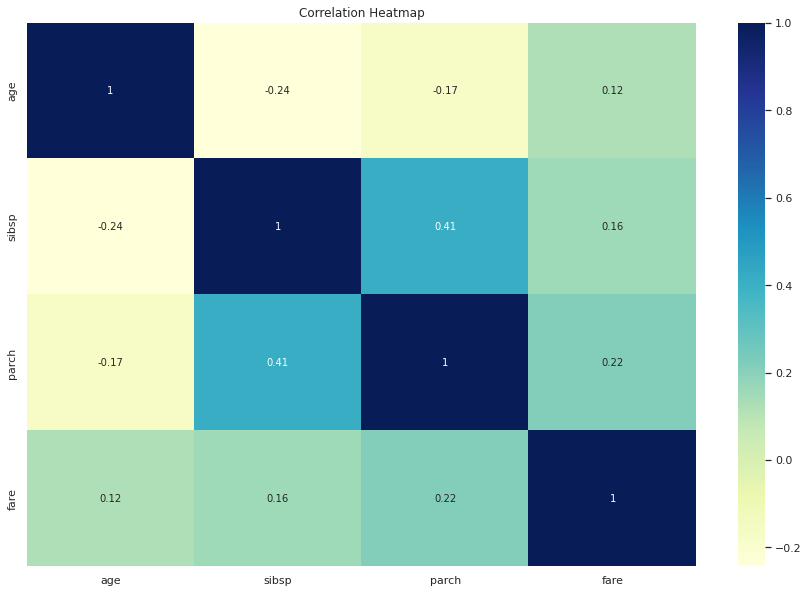

In [418]:
# Checking for high correlation between columns
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(train[continuous].corr(), annot = True, cmap = plt.cm.YlGnBu)
plt.title('Correlation Heatmap', y = 1.05);

All column pairs have correlations lower than 0.5, therefore the columns have weak to very weak corelations with each other.

**Pairplot**

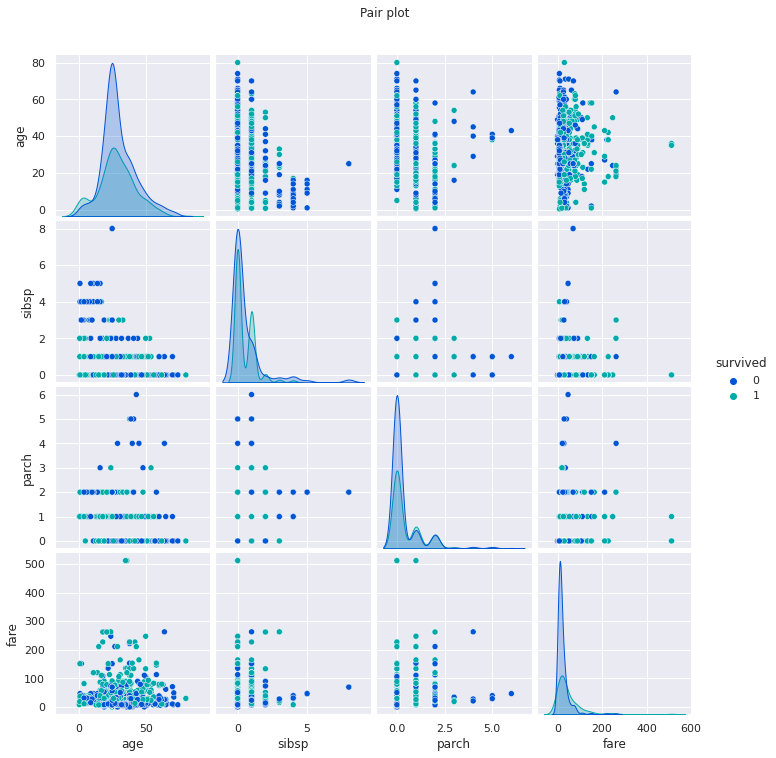

In [419]:
# Multivariate Pairplot
continuous.append('survived')
plot = sns.pairplot(train[continuous], hue = 'survived', palette = 'winter')
plot.fig.suptitle('Pair plot', y = 1.05);

The pairplot above provides a visual representation the weak correlation bewteen the continuous columns.

#### VIF

In [420]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [421]:
# Check for multicollinearity
VIF(train)

,survived,pclass,age,sibsp,parch,fare
survived,1.203723,0.458351,0.270359,0.122195,-0.090539,-0.090643
pclass,0.458351,1.918244,0.648790,-0.078486,-0.120525,0.895899
age,0.270359,0.648790,1.339707,0.233801,0.088551,0.067693
sibsp,0.122195,-0.078486,0.233801,1.291150,-0.457839,-0.210114
parch,-0.090539,-0.120525,0.088551,-0.457839,1.270214,-0.255249
fare,-0.090643,0.895899,0.067693,-0.210114,-0.255249,1.596131


VIF < 5, therefore, multicollinearity is not an issue.

### Encoding

In [422]:
# Categorical columns
categorical = train.select_dtypes(include = 'object').columns.tolist()
categorical

['sex', 'embarked']

The columns are nomial, therefore, OneHot encoding will be used.

In [423]:
# OneHot Encoding
# Train dataset
train = pd.get_dummies(train)
# Train dataset without outliers
train_no = pd.get_dummies(train_no)
# Test dataset
test = pd.get_dummies(test)

In [424]:
# Checking changes
# Train dataset
train.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [425]:
# Checking changes
# Test dataset
test.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


**Function Definition**

In [426]:
# Standard scaler
def Scaling(X_train, X_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test

# Normalize
def Normalization(X_train, X_test, l = 'l2'):
  normalizer = Normalizer(norm = l)
  X_train = normalizer.fit_transform(X_train)
  X_test = normalizer.transform(X_test)
  return X_train, X_test

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components = components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test


# KNN Classifier- scaling
def KNN_Classifier(X_train, X_test, y_train, y_test, k = 5, weights = 'uniform',
                   algorithm = 'auto', p = 2, metric = 'minkowski'):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights,
                                   algorithm = algorithm, p = p, 
                                   metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(X_test)
  # Metrics
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print(f'Weighted F1 Score: {f1}\n')
  print('Classification report')
  print(f'{"_"*70}\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# KNN Classifier - normalization
def KNN_Classifier_Norm(X_train, X_test, y_train, y_test, norm = 'l2', k = 5,
                   weights = 'uniform', algorithm = 'auto', p = 2,
                   metric = 'minkowski'):
  # Scaling
  X_train, X_test = Normalization(X_train, X_test, l = norm)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights,
                                   algorithm = algorithm, p = p, 
                                   metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(X_test)
  # Metrics
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print(f'Weighted F1 Score: {f1}\n')
  print('Classification report')
  print(f'{"_"*70}\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# KNN Classifier with LDA

# KNN Classifier with LDA
def KNN_Classifier_LDA(X_train, X_test, y_train, y_test, k = 5, weights = 'uniform',
                       algorithm = 'auto', p = 2, metric = 'minkowski', components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights, 
                                   algorithm = algorithm, p = p, metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(X_test)
  # Metrics
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print(f'Weighted F1 Score: {f1}\n')
  print('Classification report')
  print(f'{"_"*70}\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# KNN Predictions
def KNN_Classifier_Pred(X_train, X_test, y_train, pred, k = 5, weights = 'uniform',
                        algorithm = 'auto', p = 2, metric = 'minkowski', components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights, 
                                   algorithm = algorithm,  p = p, metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(pred)

  # Prediction Summary
  survived = 0
  died = 0
  for x in y_pred:
    if x == 0:
      died += 1
    elif x == 1:
      survived +=1
  # Summary dataframe
  df = pd.DataFrame({'Survived': [survived], 'Perished': [died]})

  # Summary plot
  sns.barplot(x = 'Survived', y = 'Perished', data = df, palette = 'winter')
  plt.title('Prediction Results');
  return df

# KNN Classifier with LDA
def KNN_Classifier_LDA_Pred(X_train, X_test, y_train, pred, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski', components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights, p = p, 
                                   metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(pred)
  print(y_pred[:5])

# Feature importance function
def Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= None, split = 2):
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)  
  # Importances
  importances = list(tree.feature_importances_)
  # Features
  feat = []
  imp = []
  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp, color = 'teal')
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 80 - 20 Train-Test-Split

Splitting the train dataset.

In [427]:
# Features and label
X = train.drop('survived', axis = 1).values
y = train.survived.values.reshape(-1, 1)
# 80-20 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Selection**

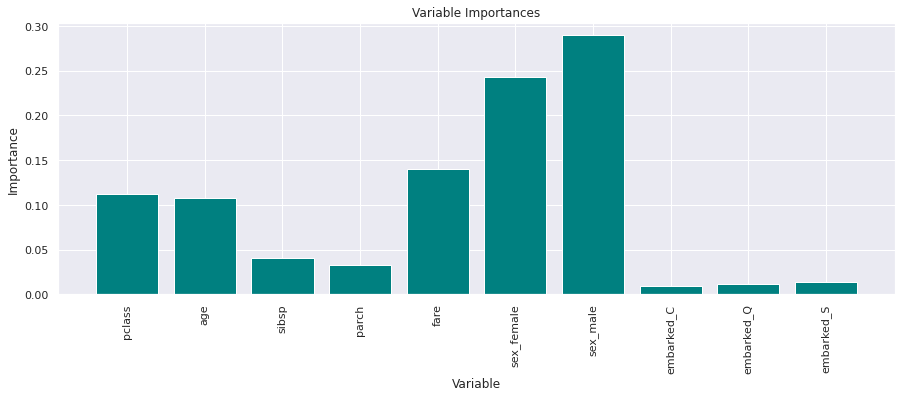

In [428]:
# Feature selection using the RandomForestClassifier
f = train.drop('survived', 1).columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= 5, split = 2)

The sex, fare, pclass and age columns have the highest importance.

In [429]:
# Feature sets
set1 = ['sex_female', 'sex_male', 'fare', 'pclass', 'age']
set2 = ['sex_female', 'sex_male', 'fare']
set3 = ['sex_female', 'sex_male']

In [430]:
# Features and label
# Set 1
X1 = train[['sex_female', 'sex_male', 'fare', 'pclass', 'age']].values
y1 = train.survived.values.reshape(-1, 1)
# 80-20 train-test-split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [431]:
# Features and label
# Set 2
X2 = train[['sex_female', 'sex_male', 'fare']].values
y2 = train.survived.values.reshape(-1, 1)
# 80-20 train-test-split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [432]:
# Features and label
# Set 3
X3 = train[['sex_female', 'sex_male', 'fare']].values
y3 = train.survived.values.reshape(-1, 1)
# 80-20 train-test-split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

**Base model**

Weighted F1 Score: 0.8120479353488635

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179


**********************************************************************



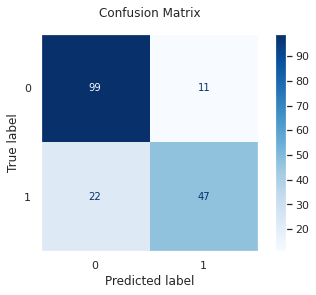

In [433]:
# Classification without LDA
KNN_Classifier(X_train, X_test, y_train, y_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

The model attains an accuracy of 82%.

### Model Optimization

**Feature Selection**

Weighted F1 Score: 0.8355208999366281

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


**********************************************************************



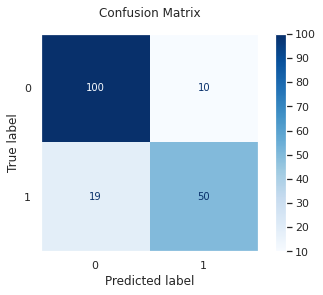

In [434]:
# Classification without LDA
# Set 1
KNN_Classifier(X1_train, X1_test, y1_train, y1_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

Reducing the features increases the accuracy to 84%.

Weighted F1 Score: 0.7804483275227175

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179


**********************************************************************



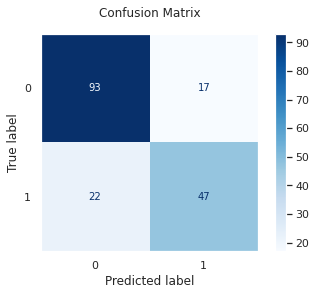

In [435]:
# Classification without LDA
# Set 2
KNN_Classifier(X2_train, X2_test, y2_train, y2_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

The accuracy drops to 78%.

Weighted F1 Score: 0.7804483275227175

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179


**********************************************************************



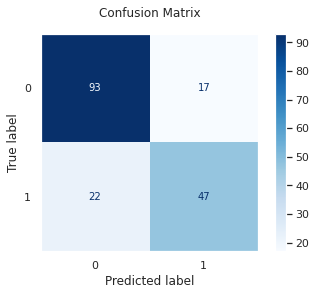

In [436]:
# Classification without LDA
# Set 3
KNN_Classifier(X3_train, X3_test, y3_train, y3_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

The accuracy does not improve.

Theerefore, set1 yields leads to the highest model accuracy.

**LDA**

Weighted F1 Score: 0.7892658669063015

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179


**********************************************************************



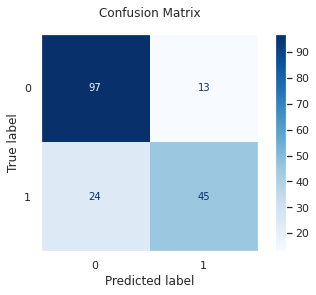

In [437]:
# LDA
# Components = all
KNN_Classifier_LDA(X_train, X_test, y_train, y_test, k = 5, weights = 'uniform',
                       algorithm = 'auto', p = 2, metric = 'minkowski', components = None)

An accuracy of 79% is attained.

Weighted F1 Score: 0.7892658669063015

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179


**********************************************************************



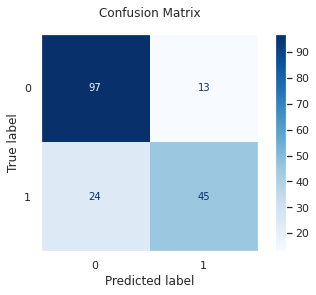

In [438]:
# LDA
# Components = 1
KNN_Classifier_LDA(X_train, X_test, y_train, y_test, k = 5, weights = 'uniform',
                       algorithm = 'auto', p = 2, metric = 'minkowski', components = 1)

Model performance does not improve.

* As the label only contans 2 classes, the maximum number of components for min(n_features, n_classes - 1), will be min(10, (2-1)) = 1.
* Accuracy remains to be 79%.

Performing LDA does not improve the model accuracy, therefore, set1 will be used for the subsequent sections.

### 70 - 30 Train-Test-Split

Splitting the train dataset.

In [439]:
# Features and label
X73 = train[set1].values
y73 = train.survived.values.reshape(-1, 1)
# 70-30 train-test-split
X73_train, X73_test, y73_train, y73_test = train_test_split(X73, y73, test_size = 0.3, random_state = 0)

Weighted F1 Score: 0.82278251356466

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.79      0.72      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268


**********************************************************************



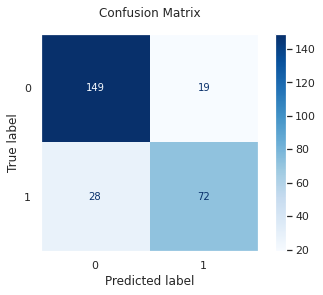

In [440]:
# Classification without LDA
KNN_Classifier(X73_train, X73_test, y73_train, y73_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

The accuracy drops from 84 to 82%.

### 60 - 40 Train-Test-Split

Splitting the train dataset.

In [441]:
# Features and label
X64 = train[set1].values
y64 = train.survived.values.reshape(-1, 1)
# 60-40 train-test-split
X64_train, X64_test, y64_train, y64_test = train_test_split(X64, y64, test_size = 0.4, random_state = 0)

Weighted F1 Score: 0.8148424871993674

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       221
           1       0.80      0.69      0.74       136

    accuracy                           0.82       357
   macro avg       0.81      0.79      0.80       357
weighted avg       0.82      0.82      0.81       357


**********************************************************************



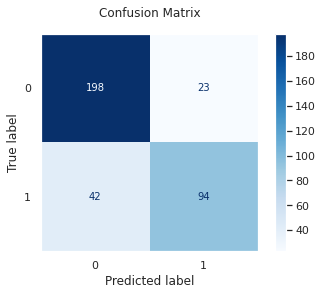

In [442]:
# Classification without LDA
KNN_Classifier(X64_train, X64_test, y64_train, y64_test, k = 5, weights = 'uniform',
                   p = 2, metric = 'minkowski')

The accuracy remains the same, however, the weighted F1  score drops.

It is evident that increase in the test size and decrease in the training set size leads to a decrease in prediction accuracy. 



>The KNN algorithm calculates the distances of all vectors in the training set and stores them. The calculated distancecs are then sorted and the K nearest vectors are stored. The most frequent class is displayed by K nearest vectors. During prediction, the algorithm looks for k-neighbours using the stored data, therefore, decreasing the training dataset can lead to an increase in inaccurate predictions as some fundamental points may not be captured, leading to misclassification depending on the distance between the training data points and the test data points [link](https://towardsdatascience.com/k-nearest-neighbours-knn-algorithm-common-questions-and-python-implementation-14377e45b738).



The accuracy and weighted F1 score decreases with decrease in the train dataset size, therefore, the 80-20 split datasets will be used, as they lead to the highest model acuracy of 84%.

#### 2. Rescaling

The base model has been scaled using standardization, and it has an accuracy of 84%. Normalization will be applied and the performance will be compared.

Weighted F1 Score: 0.7518663172986602

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179


**********************************************************************



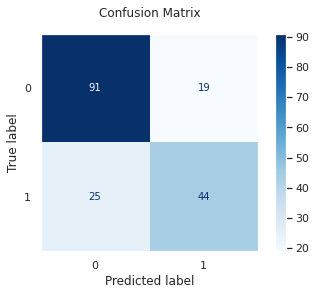

In [443]:
# Normalization = l1
KNN_Classifier_Norm(X1_train, X1_test, y1_train, y1_test, norm = 'l1', k = 5,
                   weights = 'uniform', p = 2, metric = 'minkowski')

Accuracy drops to 75%.

Weighted F1 Score: 0.7683616689551963

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.65      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179


**********************************************************************



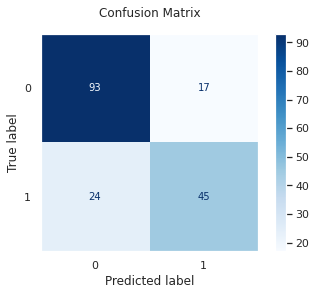

In [444]:
# Normalization = l2
KNN_Classifier_Norm(X1_train, X1_test, y1_train, y1_test, norm = 'l2', k = 5,
                   weights = 'uniform', p = 2, metric = 'minkowski')

The accuracy improves from the previous one, but is still lower than the 84% accuracy achieved previously.

Weighted F1 Score: 0.7683616689551963

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.65      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179


**********************************************************************



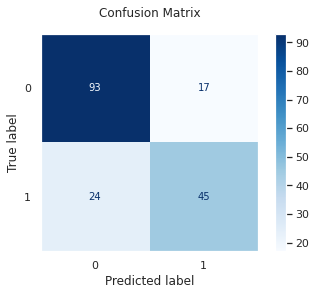

In [445]:
# Normalization = max
KNN_Classifier_Norm(X1_train, X1_test, y1_train, y1_test, norm = 'max', k = 5,
                   weights = 'uniform', p = 2, metric = 'minkowski')

The model accuracy is 77%, which is still low. Therefore, standardization will be used.

#### 3. Hyperparameter Tuning

The best combination of k, weighting function, algorithm, power metric and distance metric will be determined using GridSearch.

In [446]:
# Grid search function
def Grid(X, y, params, scoring = 'accuracy', folds = 5):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Classifier
  classifier = KNeighborsClassifier()

  # Grid search
  grid = GridSearchCV(classifier, param_grid = params, scoring = scoring,
                      cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

**Optimal K value range**

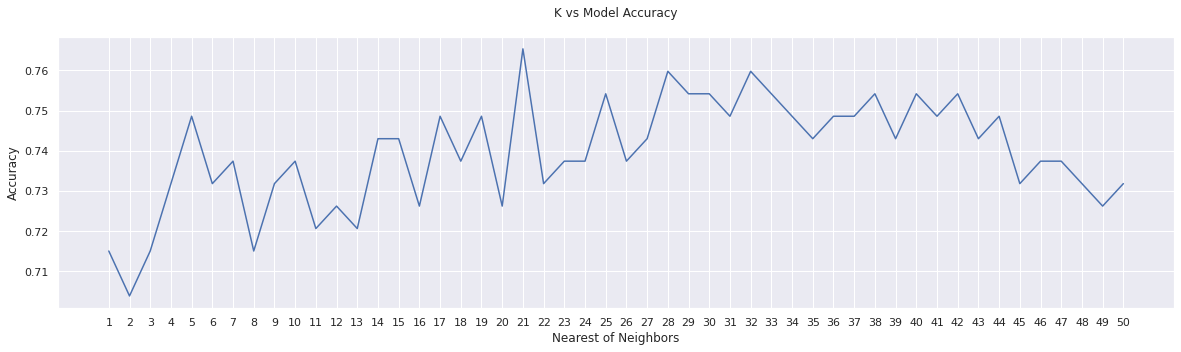

In [447]:
# Plotting model accuracy vs number of K values
# Placeholder for model accuaries
accuracies = []
# Obtaining accuracies for different k values
for k in range(1, 51):
    #Train Model and Predict  
    classifier = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
    y_pred= classifier.predict(X1_test)
    accuracies.append(accuracy_score(y1_test, y_pred))

# Line plot
fig, ax = plt.subplots(figsize = (20, 5))
k_values = np.arange(1,51, 1)
plt.plot(range(1,51), accuracies)
plt.title('K vs Model Accuracy', y = 1.05)
plt.xticks(k_values)
plt.xlabel('Nearest of Neighbors')
plt.ylabel('Accuracy')
plt.show()

* The overall trend from k = 1 to 32 is an increase in accuracy, before it start droppping.
* The entire range will be used to determine the optimal value.

In [448]:
# Hyperparameter grid
grid_params = {'n_neighbors' : np.arange(1, 51).tolist(), 
               'weights': ['uniform', 'distance'], 
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
               'p' : [1, 2], 
               'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']    
}


Selected Features

In [269]:
# Grid search, scoring = balanced accuracy
Grid(X1, y1, params = grid_params, scoring = 'balanced_accuracy', folds = 10)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best parameters: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best scores: 0.8133084344849051


The balanced accuracy consideres the class imbalance of the label column. The accuracy obtained is 81%.

In [270]:
# Grid search, scoring = accuracy
Grid(X1, y1, params = grid_params, scoring = 'accuracy', folds = 10)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best scores: 0.8327590511860175


Using normal accuracy, the best score is 83%.

Optimal hyperparameters:
1. n_neighbors = 4, 5
2. algorithm = 'ball_tree'(works with imbalanced clusters), 'auto'
3. power metric (p) = 1
4. distance metric = euclidean
5. weights = uniform

**Implementing the Selected Hyperparameters**

Selected Features

Weighted F1 Score: 0.8355208999366281

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


**********************************************************************



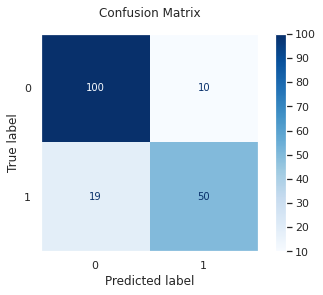

In [453]:
# Implementing the selected hyperparameters
# For balanced_accuracy
KNN_Classifier(X1_train, X1_test, y1_train, y1_test, k = 5, weights = 'uniform',
                   algorithm = 'ball_tree', p = 1, metric = 'euclidean')

The accuracy remains the same.

Weighted F1 Score: 0.83241840394157

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.88      0.67      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179


**********************************************************************



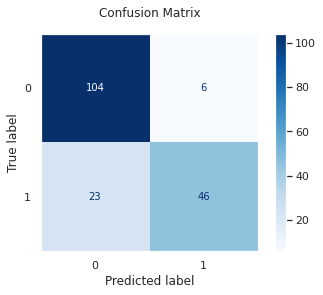

In [274]:
# Implementing the selected hyperparameters
# For accuracy
KNN_Classifier(X1_train, X1_test, y1_train, y1_test, k = 4, weights = 'uniform',
                   algorithm = 'auto', p = 1, metric = 'euclidean')

The same accuracy is attained but the F1 score decreases.

All Features

In [ ]:
# Grid search
Grid(X, y, params = grid_params, scoring = 'balanced_accuracy', folds = 10)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best scores: 0.8034344849050731


The balanced accuracy consideres the class imbalance of the label column. The accuracy obtained is 81%.

In [ ]:
# Grid search
Grid(X, y, params = grid_params, scoring = 'accuracy', folds = 10)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
Best parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
Best scores: 0.8271285892634207


Using normal accuracy, the best score is 83%.

Optimal hyperparameters:
1. n_neighbors = 3, 16
2. algorithm = 'ball_tree'(works with imbalanced clusters), 'brute'
3. power metric (p) = 1
4. distance metric = manhattan
5. weights = uniform

Weighted F1 Score: 0.8361582536512363

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179


**********************************************************************



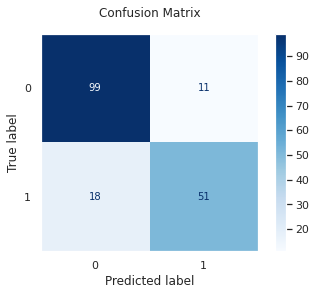

In [451]:
# Implementing the selected hyperparameters
# For balanced_accuracy
KNN_Classifier(X_train, X_test, y_train, y_test, k = 3, weights = 'uniform',
                   algorithm = 'ball_tree', p = 1, metric = 'manhattan')

After hyperparameter tuning, the model accuracy for the original dataset increases to 84%, and the weighted F1 score is 0.8362. Therefore, this model has the highest performance.

Weighted F1 Score: 0.8226413791449877

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179


**********************************************************************



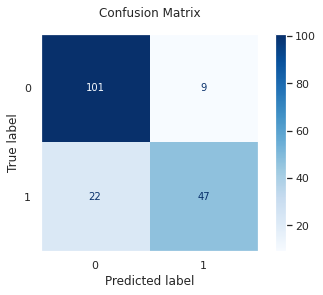

In [452]:
# Implementing the selected hyperparameters
# For accuracy
KNN_Classifier(X_train, X_test, y_train, y_test, k = 16, weights = 'uniform',
                   algorithm = 'brute', p = 1, metric = 'manhattan')

With the scoring = accuracy, a lower accuracy of 83% is obtained.

The optimal model has an accuracy of 84% and is trained on the original dataset.

**Performance Summary**

*Initial Model*
1. Accuracy = 84%
2. Weighted F1 Score = 0.8355
3. Feature selection = ['sex_female', 'sex_male', 'fare', 'pclass', 'age']
4. Standardization


*Tuned Model*

The performance remains the same.

Optimal hyperparameters:
1. n_neighbors =  3
2. algorithm = ball_tree (works with imbalanced clusters)
3. power metric (p) = 1
4. distance metric = manhattan
5. weights = uniform

## 7. Implementing the Solution

In [454]:
# KNN Prediction function
def KNN_Classifier_Pred(X_train, X_test, y_train, pred, k = 3, weights = 'uniform',
                   algorithm = 'ball_tree', p = 1, metric = 'manhattan'):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Classifier
  classifier =KNeighborsClassifier(n_neighbors = k, weights = weights, 
                                   algorithm = algorithm,  p = p, metric = metric)
  classifier.fit(X_train, y_train)
  # Prediction
  y_pred = classifier.predict(pred)

  # Prediction Summary
  survived = 0
  died = 0
  for x in y_pred:
    if x == 0:
      died += 1
    elif x == 1:
      survived +=1
  # Summary dataframe
  df = pd.DataFrame({'Survived': [survived], 'Perished': [died]})

  # Summary plot
  ax = sns.countplot(x = y_pred, data = df, palette = 'autumn')
  ax.set_xticklabels(['Perished', 'Suvived'])
  ax.set_xlabel('Survival Status')
  ax.set_ylabel('Number of Passengers')
  ax.set_title('Prediction Results', y = 1.05)
  for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+ 0.01))

  plt.show()
  

**Prediction with all features - optimal model**

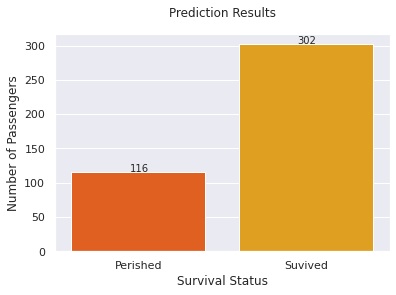

In [457]:
# Predicting the test set
pred = test.values.tolist()
KNN_Classifier_Pred(X_train, X_test, y_train, pred = pred)

Most of the passengers survived, as per this test set.

**Prediction with Selected Features**

Optimal values for this set will be used.

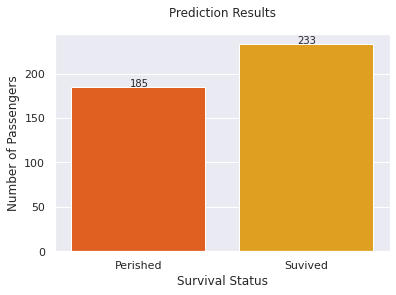

In [ ]:
# Predicting the test set
pred = test[set1].values.tolist()
KNN_Classifier_Pred(X1_train, X1_test, y1_train, pred = pred, k = 5,
                    weights = 'uniform', algorithm = 'ball_tree', p = 1, metric = 'euclidean')

For the second most optimal model, from the prediction results, most of the passengers survived. This corroborates the previous prediction results.

## 8. Challenging the Solution

1. The following datasets were used to train models. The original dataset, a dataset with outliers removed, and a dataset with features with the highest importance. The dataset with the composed of allfeatures led to the highest model accuracy after hyperparameter tuning was performed.

2. LDA was also performed, however, implementing it did not improve the model's accuracy.

2. Different train and test sets were used and model performances compared. The 80 - 20 dataset split led to the highest model accuracy.

3. Standardization of the feature sets before model training led to a high model accuracy.

4. Performing grid search after setting the model score to balanced accuracy instead of normal accuracy led to selection of hyperparameters that when implemented, led to a higher model accuracy than when normal accuracy was used.

## 9. Conclusion

In [351]:
# Previously selected features
set1

['sex_female', 'sex_male', 'fare', 'pclass', 'age']

Features with the highest importance in predicting passenger survival were the gender of the passenger, the fare, the passenger class and the age.

Feature selection led to the highest accuracy of 84% being obtained, after model optimization was performed.

## 10. Follow Up Questions

### a). Did we have the right data?

Yes, as the most important features that determined passenger survival awere accurate. Furthermore, a model accuracy of 84% was attained. The model met the previously set success criteria.

### b). Do we need other data to answer our question?

Data with additional features (increased granularity) cold be used to train the KNN model, in order to try and increase the prediction accuracy.

### c). Did we have the right question?

Yes, we have the right question as the features, are sufficient and necessary in predicting passenger survival. 

Furthermore, a high accuracy of 84% was attained after model optimization, further proving the relevance of the question.